In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dython import nominal

In [4]:
pwd

'C:\\Users\\P70065719\\Desktop\\git\\CedMD\\sampling'

In [5]:
annos_path='luna_annotations1.csv'
df=pd.read_csv(annos_path)

In [6]:
df.columns

Index(['Unnamed: 0', 'seriesuid', 'coordX', 'coordY', 'coordZ', 'Xorig',
       'Yorig', 'Zorig', 'Xspac', 'Yspac', 'Zspac', 'Xnpy', 'Ynpy', 'Znpy',
       'subtlety', 'internal_structure', 'calcification', 'sphericity',
       'margin', 'lobulation', 'spiculation', 'texture',
       'internal_structure_new', 'calcification_new', 'sphericity_new',
       'texture_new', 'slicenumber', 'malignancy', 'diameter_mm'],
      dtype='object')

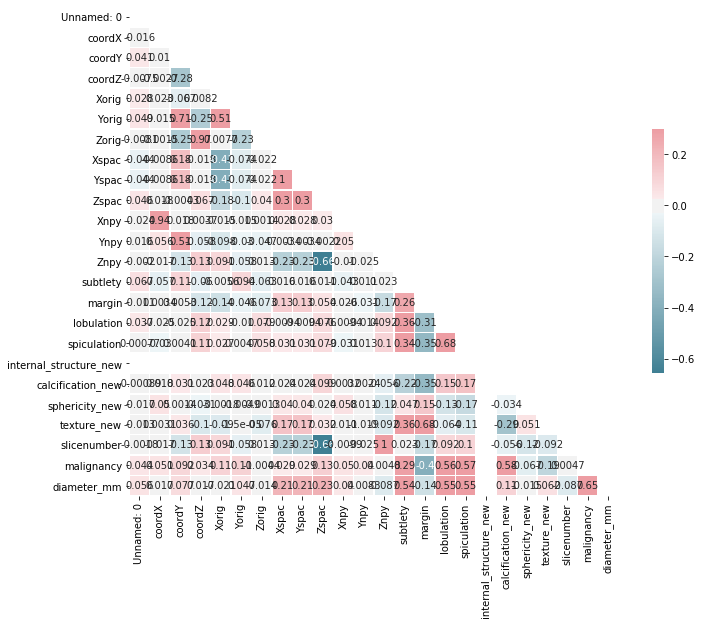

In [8]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
df.dtypes

Unnamed: 0                  int64
seriesuid                  object
coordX                    float64
coordY                    float64
coordZ                    float64
Xorig                     float64
Yorig                     float64
Zorig                     float64
Xspac                     float64
Yspac                     float64
Zspac                     float64
Xnpy                      float64
Ynpy                      float64
Znpy                      float64
subtlety                  float64
internal_structure         object
calcification              object
sphericity                 object
margin                    float64
lobulation                float64
spiculation               float64
texture                    object
internal_structure_new      int64
calcification_new           int64
sphericity_new              int64
texture_new                 int64
slicenumber                 int64
malignancy                float64
diameter_mm               float64
dtype: object

In [44]:
# df.drop('seriesuid',axis=1,inplace=True)

In [45]:
# df.drop('seriesuid',axis=1,inplace=True)
# ax.set_ylim(len(df)-0.5, -0.5)
# corr=nominal.associations(df,theil_u=False,nominal_columns=['subtlety','margin','lobulation','spiculation','calcification_new','sphericity_new','texture_new','malignancy'],figsize=(10,8),padspace=1)

In [46]:
# plt.savefig('cramer_v1.png')

In [47]:
plt.hist(df['malignancy'],bins=20)

(array([ 72.,  15.,  13.,  33.,   0.,  49.,  91.,  72., 202.,   0., 179.,
        115.,  63.,  66.,   0.,  67.,  49.,  29.,  35.,  22.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

(array([523., 320., 119.,  80.,  55.,  32.,  27.,  11.,   3.,   2.]),
 array([ 3.2534432 ,  6.1551019 ,  9.05676061, 11.95841931, 14.86007802,
        17.76173672, 20.66339543, 23.56505413, 26.46671284, 29.36837154,
        32.27003025]),
 <a list of 10 Patch objects>)

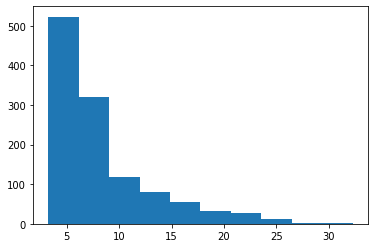

In [48]:
plt.hist(df['diameter_mm'],bins=10)

In [59]:
df.shape
df['diameter_bin']=pd.cut(df['diameter_mm'],bins=10)
df['slicenumber']=((df['coordZ']-df['Zorig'])/df['Zspac'])

In [60]:
df.head()

Unnamed: 0                                          seriesuid     coordX  \
0        1011  1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500... -87.298239   
1        1012  1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500... -42.906493   
2         717  1.3.6.1.4.1.14519.5.2.1.6279.6001.275755514659... -90.940454   
3         923  1.3.6.1.4.1.14519.5.2.1.6279.6001.332829333783... -12.648012   
4         333  1.3.6.1.4.1.14519.5.2.1.6279.6001.187966156856...  70.125698   

       coordY      coordZ       Xorig       Yorig       Zorig     Xspac  \
0   56.271657 -112.290634 -161.800003 -167.500000 -301.000000  0.654297   
1   -3.298740 -115.103859 -161.800003 -167.500000 -301.000000  0.654297   
2 -230.219321 -217.071482 -197.619140 -394.619140 -401.500000  0.761719   
3  100.027113 -125.310699 -206.899994 -199.000000 -330.000000  0.816406   
4  -37.518417 -145.808697 -179.300003 -191.300003 -343.200012  0.664062   

      Yspac  ...  spiculation         texture  internal_structure_new  \
0  0.654297  ...         2.25  [ 0.  0.  1. ]                       1   
1  0.654297  ...         2.00  [ 0.  0.  1. ]                       1   
2  0.761719  ...         2.00  [ 0.  0.  1. ]                       1   
3  0.816406  ...         2.00  [ 0.  0.  1. ]                       1   
4  0.664062  ...         1.75  [ 0.  0.  1. ]                       1   

   calcification_new  sphericity_new texture_new slicenumber malignancy  \
0                  3               2           3  150.967493        1.0   
1                  3               2           3  148.716913        1.0   
2                  3               2           3  263.469316        1.0   
3                  5               2           3  163.751441        1.0   
4                  3               1           3  315.826104        1.0   

   diameter_mm    diameter_bin  
0     5.965580  (3.224, 6.155]  
1     5.090964  (3.224, 6.155]  
2     7.663782  (6.155, 9.057]  
3     5.264828  (3.224, 6.155]  
4     4.073946  (3.224, 6.155]  

[5 rows x 30 columns]

In [61]:
df['slicenumber']=df['slicenumber'].astype('int')

In [62]:
df.head()

Unnamed: 0                                          seriesuid     coordX  \
0        1011  1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500... -87.298239   
1        1012  1.3.6.1.4.1.14519.5.2.1.6279.6001.534083630500... -42.906493   
2         717  1.3.6.1.4.1.14519.5.2.1.6279.6001.275755514659... -90.940454   
3         923  1.3.6.1.4.1.14519.5.2.1.6279.6001.332829333783... -12.648012   
4         333  1.3.6.1.4.1.14519.5.2.1.6279.6001.187966156856...  70.125698   

       coordY      coordZ       Xorig       Yorig       Zorig     Xspac  \
0   56.271657 -112.290634 -161.800003 -167.500000 -301.000000  0.654297   
1   -3.298740 -115.103859 -161.800003 -167.500000 -301.000000  0.654297   
2 -230.219321 -217.071482 -197.619140 -394.619140 -401.500000  0.761719   
3  100.027113 -125.310699 -206.899994 -199.000000 -330.000000  0.816406   
4  -37.518417 -145.808697 -179.300003 -191.300003 -343.200012  0.664062   

      Yspac  ...  spiculation         texture  internal_structure_new  \
0  0.654297  ...         2.25  [ 0.  0.  1. ]                       1   
1  0.654297  ...         2.00  [ 0.  0.  1. ]                       1   
2  0.761719  ...         2.00  [ 0.  0.  1. ]                       1   
3  0.816406  ...         2.00  [ 0.  0.  1. ]                       1   
4  0.664062  ...         1.75  [ 0.  0.  1. ]                       1   

   calcification_new  sphericity_new texture_new slicenumber malignancy  \
0                  3               2           3         150        1.0   
1                  3               2           3         148        1.0   
2                  3               2           3         263        1.0   
3                  5               2           3         163        1.0   
4                  3               1           3         315        1.0   

   diameter_mm    diameter_bin  
0     5.965580  (3.224, 6.155]  
1     5.090964  (3.224, 6.155]  
2     7.663782  (6.155, 9.057]  
3     5.264828  (3.224, 6.155]  
4     4.073946  (3.224, 6.155]  

[5 rows x 30 columns]

In [63]:
df.to_csv('check_diameter.csv')

In [64]:
y=df['diameter_bin']
df.drop('diameter_bin',inplace=True,axis=1)
X=df

In [65]:
df.tail()

Unnamed: 0                                          seriesuid  \
1167         449  1.3.6.1.4.1.14519.5.2.1.6279.6001.213140617640...   
1168         763  1.3.6.1.4.1.14519.5.2.1.6279.6001.290135156874...   
1169         850  1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722...   
1170         489  1.3.6.1.4.1.14519.5.2.1.6279.6001.219349715895...   
1171         714  1.3.6.1.4.1.14519.5.2.1.6279.6001.275007193025...   

         coordX      coordY      coordZ       Xorig       Yorig       Zorig  \
1167  54.577717  137.279089 -626.592114 -141.840662   23.145622 -825.199951   
1168 -59.390535   91.298247 -217.315565 -178.399994 -186.699997 -386.500000   
1169  -6.607170   22.559373 -143.792964  167.199997  155.000000 -307.250000   
1170 -69.251320   17.496229 -201.304243  195.000000  140.000000 -327.000000   
1171 -29.741414  -18.461668 -134.245952 -158.000000 -158.000000 -226.000000   

         Xspac     Yspac  ...  lobulation  spiculation  \
1167  0.617188  0.617188  ...    3.333333     1.666667   
1168  0.703125  0.703125  ...    3.333333     1.666667   
1169  0.605469  0.605469  ...    3.500000     1.500000   
1170  0.761719  0.761719  ...    3.000000     1.333333   
1171  0.617188  0.617188  ...    2.000000     1.000000   

                                    texture  internal_structure_new  \
1167  [ 0.          0.66666667  0.33333333]                       1   
1168                         [ 0.  0.  1. ]                       1   
1169                         [ 0.  0.  1. ]                       1   
1170  [ 0.66666667  0.33333333  0.        ]                       1   
1171                         [ 0.  0.  1. ]                       1   

      calcification_new sphericity_new texture_new slicenumber  malignancy  \
1167                  6              2           2         198         5.0   
1168                  6              2           3          67         5.0   
1169                  6              2           3         130         5.0   
1170                  6              2           1         100         5.0   
1171                  6              2           3          73         5.0   

      diameter_mm  
1167    13.962632  
1168    18.998648  
1169     9.484890  
1170    10.378710  
1171    17.988647  

[5 rows x 29 columns]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.017)

In [67]:
df.shape

(1172, 29)

In [68]:
df.shape

(1172, 29)

In [69]:
X_test.shape

(20, 29)

In [ ]:
X_test

In [70]:
X_test.to_csv('positive_samples_new.csv',index=False)